<a href="https://colab.research.google.com/github/Jp-07-sys/Ejercicios-de-python/blob/main/Minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print(x)
print(y)
df.head(10)

# Datos obtenidos de
# K.F. Riley, M. P. Hobson, S. J. Bence, 2006
# Mathematical Methods for Physics and Engineering.
# Cambridge University Press, 3rd Edition, 1363.

[1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
[2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]


,x,y
0,1.85,2.26
1,2.72,3.10
2,2.81,3.80
3,3.06,4.11
4,3.42,4.74
5,3.76,4.31
6,4.31,5.24
7,4.47,4.03
8,4.64,5.69
9,4.99,6.57


##Minimos cuadrados
-Aproximacion\
-Regresion\
F=Kx, dondek es el material del resorte\
-Yp=mx+b
Yp: modelo lineal\
Yobs: Datos observados\
n: Numero de puntos



1.1091488253986432
0.38873678208868867


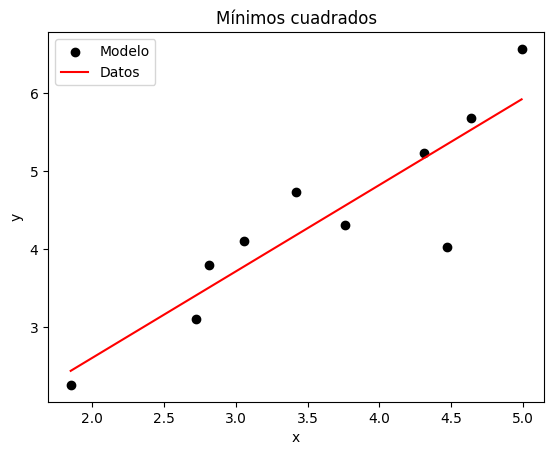

[ 7.99389863  9.85876088  7.75144786  7.96272049 11.77160833  5.78042612
  1.35175154 32.67077002  2.72078503  9.84186574]
3.603
0.3592404573477115


In [36]:
#Minimos cuadrados
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)
import matplotlib.pyplot as plt
x = df["x"].to_numpy()
y = df["y"].to_numpy()
n=len(x)

sumX=np.sum(x)
sumY=np.sum(y)
sumXY=np.sum(x*y)
sumX2=np.sum(x**2)

m= n*sumXY-sumX*sumY
m1=m/(n*sumX2-sumX**2)

b=(sumY-m1*sumX)/n

ymodelo=m1*x+b
print(m1)
print(b)


x_line=np.linspace(min(x),max(x),100)
y_line=m1*x_line+b

plt.scatter(x,y,color="black")

plt.plot(x,ymodelo,color="red")

plt.title("Mínimos cuadrados")
plt.legend(["Modelo","Datos"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

res=y-ymodelo
#Error relativo
er=np.abs(res/y)*100
print(er)
#Media
media=np.mean(x)
#Varianza
var=np.sum(res**2)/(n-2)
#Desviacion estandar
dv=np.sqrt(var)
print(media)
print(var)

[ 7.99389863  9.85876088  7.75144786  7.96272049 11.77160833  5.78042612
  1.35175154 32.67077002  2.72078503  9.84186574]
3.603
0.3592404573477115
Alta variabilidad


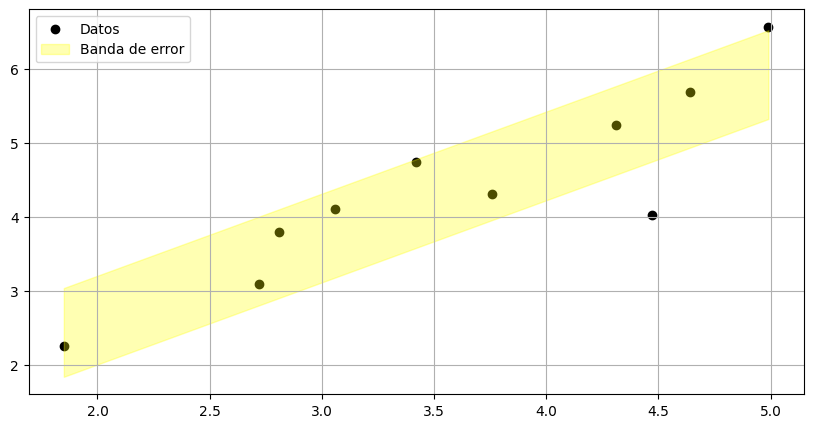

In [46]:
res=y-ymodelo
#Error relativo
er=np.abs(res/y)*100
print(er)
#Media
media=np.mean(x)
#Varianza
var=np.sum(res**2)/(n-2)
#Desviacion estandar
dv=np.sqrt(var)
print(media)
print(var)
# Coeficiente de variacion
CV=(dv/media)*100
if CV < 0.5:
  print("Baja variabilidad")
else:
  print("Alta variabilidad")

linsup=y_line + dv
lininf=y_line - dv

plt.figure(figsize=(10,5))
plt.scatter(x,y,color="black",label="Datos")
plt.fill_between(x_line,lininf,linsup,color="yellow",alpha=0.3,label="Banda de error")
plt.legend()
plt.grid()
plt.show()

-0.005716456678518833 1.1491159490857963 0.3241375618478699


/tmp/ipython-input-939742084.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


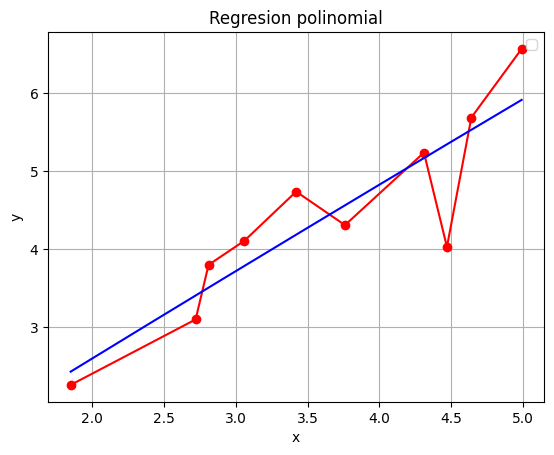

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=2, include_bias=True)
x_poly=poly.fit_transform(x.reshape(-1, 1))

model=LinearRegression()
model.fit(x_poly,y)

c=model.intercept_
a,b=model.coef_[2],model.coef_[1]
print(a,b,c)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit=poly.transform(x_fit)

y_final=model.predict(y_fit)

plt.plot(x,y,color="red", marker="o")
plt.plot(x_fit,y_final,color="blue",)

plt.title("Regresion polinomial")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

0.34814917424630565 12.404347928894811 -10.935065842229788


/tmp/ipython-input-2583330988.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


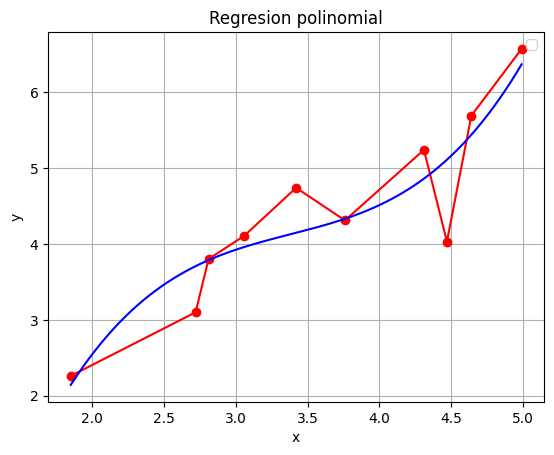

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=3, include_bias=True)
x_poly=poly.fit_transform(x.reshape(-1, 1))

model=LinearRegression()
model.fit(x_poly,y)

c=model.intercept_
a,b=model.coef_[3],model.coef_[1]
print(a,b,c)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit=poly.transform(x_fit)

y_final=model.predict(y_fit)

plt.plot(x,y,color="red", marker="o")
plt.plot(x_fit,y_final,color="blue",)

plt.title("Regresion polinomial")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

In [ ]:
_